# Tesla Technical Analysis Reseach
is a trading discipline employed to evaluate investments and identify trading opportunities in price trends and patterns seen on charts. Technical analysts believe past trading activity and price changes of a security can be valuable indicators of the security's future price movements

##### Disclosure: Technical should not be taken as a recommendation to buy or sell any security, this is not financial advise. This is purely perspective research only, using computational finance trading strategies for stock performances throughout different time series.  Statistical data within this case study are thoroughly researched and believed to be accurate using Yahoo Finance data package. However, discrepancies can occur with the data provided.  As an investor you should conduct your own research and recheck  for any missing data before making any final decisions regarding buying or selling any stocks. Past performances of stocks mentioned in this portfolio are not a guarantee of future performances. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
TSLA_Analysis = pd.read_csv("TSLA_Analysis.csv", index_col= "Date", parse_dates= ["Date"])

In [3]:
TSLA_Analysis.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000
2015-01-08,42.562000,42.759998,42.001999,42.124001,42.124001,17212500


In [4]:
TSLA_Analysis.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,444.609985,500.140015,440.109985,498.320007,498.320007,118374400
2020-09-01,502.140015,502.489990,470.510010,475.049988,475.049988,90119400
2020-09-02,478.989990,479.040009,405.119995,447.369995,447.369995,96176100
2020-09-03,407.230011,431.799988,402.000000,407.000000,407.000000,87596100
2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900


We will be using the close data to conduct technical analysis

In [5]:
TSLA_Analysis = TSLA_Analysis.Close.to_frame()

Using the SMA(Simple Moving Average) 50 represents 50 trading days 

In [6]:
TSLA_Analysis["SMA50"] = TSLA_Analysis.Close.rolling(window = 50).mean()

In [7]:
TSLA_Analysis.tail()

,Close,SMA50
Date,,
2020-08-31,498.320007,307.684797
2020-09-01,475.049988,313.208517
2020-09-02,447.369995,318.148797
2020-09-03,407.000000,322.445397
2020-09-04,418.320007,326.867877


Now to include the SMA 200 to represent 200 trading days for comparison to the SMA 50

In [8]:
TSLA_Analysis["SMA200"] = TSLA_Analysis.Close.rolling(window = 200).mean()

In [9]:
TSLA_Analysis.tail()

,Close,SMA50,SMA200
Date,,,
2020-08-31,498.320007,307.684797,171.314139
2020-09-01,475.049988,313.208517,173.340039
2020-09-02,447.369995,318.148797,175.224719
2020-09-03,407.000000,322.445397,176.909729
2020-09-04,418.320007,326.867877,178.641809


now to visualzie the data within the past 5 years performance of the S&P 500

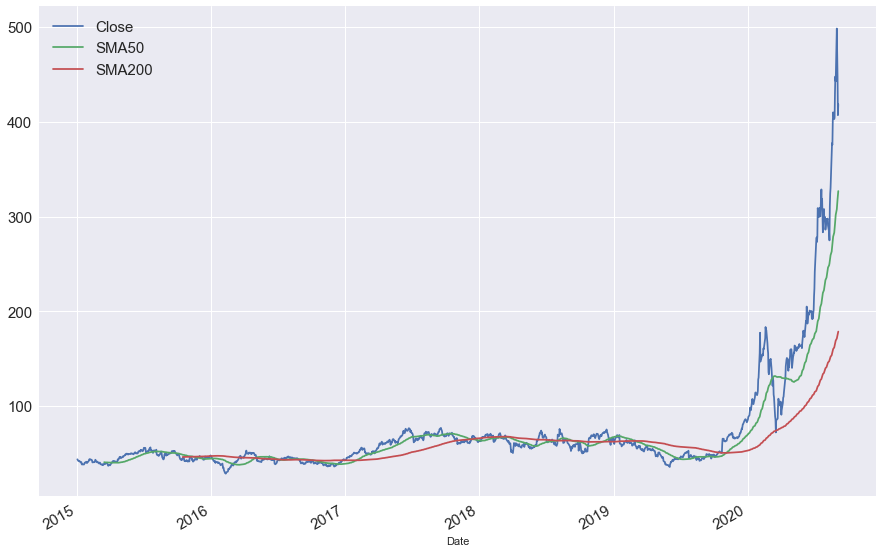

In [10]:
TSLA_Analysis.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

SMA Trading analysis: SMA Trading analysis: When the SMA 50 is above the SMA 200 that is a bullish buy/hold sign. However, when the SMA 200 is above the SMA 50, that’s a bearish/sell sign with regards to trading analysis. However, value investors could use these indicators to open new long term positions. Whenever investors notice the SMA 200 is crossing above the SMA 50, that could be a sign for them to buy more shares of that long term stock, hence "buying the dip". Depending on your investment strategy long term or short term, technical analysis indications is useful for both strategies.


Finding the Return vs Risk monthly horizon of Tesla 

In [11]:
TSLA_Analysis_m = TSLA_Analysis.Close.resample("M", kind = "period").last().to_frame()

In [12]:
TSLA_Analysis_m.head()

,Close
Date,
2015-01,40.720001
2015-02,40.667999
2015-03,37.754002
2015-04,45.209999
2015-05,50.160000


In [13]:
TSLA_Analysis_m["Return"] = TSLA_Analysis_m.pct_change()

In [14]:
TSLA_Analysis_m.head()

,Close,Return
Date,,
2015-01,40.720001,NaN
2015-02,40.667999,-0.001277
2015-03,37.754002,-0.071653
2015-04,45.209999,0.197489
2015-05,50.160000,0.109489


Return and Risk of Telsa within the past 5 years, we will be using 20 to determine how well Tesla performned within a 20 month time frame

In [16]:
TSLA_Analysis_m["Roll_Return"] = TSLA_Analysis_m.Return.rolling(20).mean()

In [17]:
TSLA_Analysis_m.tail()

,Close,Return,Roll_Return
Date,,,
2020-05,167.000000,0.067939,0.078474
2020-06,215.962006,0.293186,0.079433
2020-07,286.152008,0.325011,0.093733
2020-08,498.320007,0.741452,0.133327
2020-09,418.320007,-0.160539,0.129174


In [18]:
TSLA_Analysis_m["Roll_Risk"] = TSLA_Analysis_m.Return.rolling(20).std()

In [19]:
TSLA_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,167.000000,0.067939,0.078474,0.215263
2020-06,215.962006,0.293186,0.079433,0.216221
2020-07,286.152008,0.325011,0.093733,0.222765
2020-08,498.320007,0.741452,0.133327,0.262604
2020-09,418.320007,-0.160539,0.129174,0.266738


Annualizing the data

In [20]:
TSLA_Analysis_m["Roll_Return"] = TSLA_Analysis_m["Roll_Return"] * 12
TSLA_Analysis_m["Roll_Risk"] = TSLA_Analysis_m["Roll_Risk"] * np.sqrt(12)

In [21]:
TSLA_Analysis_m.tail()

,Close,Return,Roll_Return,Roll_Risk
Date,,,,
2020-05,167.000000,0.067939,0.941688,0.745694
2020-06,215.962006,0.293186,0.953192,0.749010
2020-07,286.152008,0.325011,1.124791,0.771681
2020-08,498.320007,0.741452,1.599929,0.909688
2020-09,418.320007,-0.160539,1.550084,0.924009


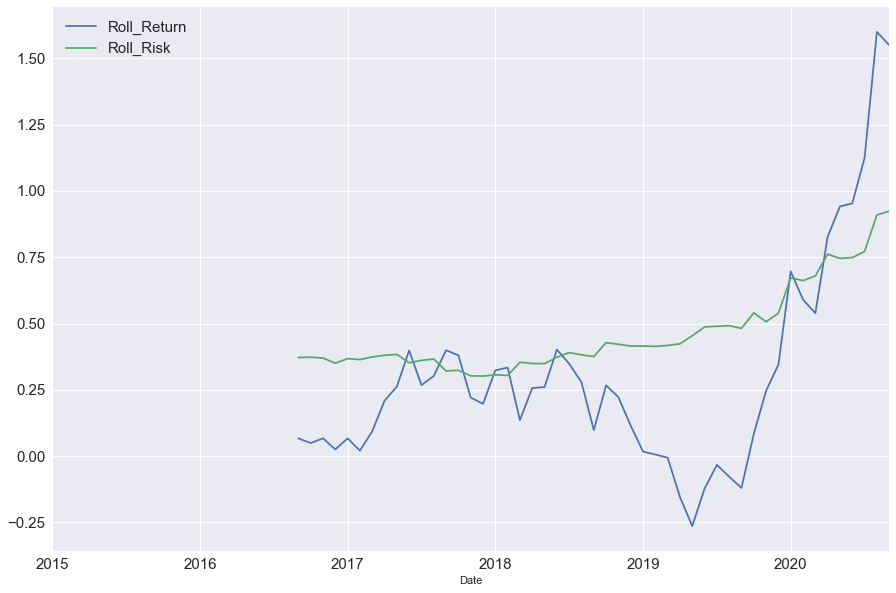

In [23]:
TSLA_Analysis_m.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

Analysis of the Return vs Risk time frame: During large declines in returns we can notice the risk rises while when return rises, risk tends to decrease. within a 20 month time frame Tesla has a much greater return then risk